In [ ]:
cd /content/drive/My\ Drive/darknetnew 


/content/drive/My Drive/darknetnew


In [ ]:
pwd

'/content/drive/My Drive/darknetnew'

In [ ]:
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
print('Done')

Done


In [ ]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [ ]:
!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_opencv.cpp:1130:10: note: ...thi

In [ ]:

!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show


Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.562007, GIOU: 0.505120), Class: 0.615467, Obj: 0.000601, No Obj: 0.000203, .5R: 1.000000, .75R: 0.000000, count: 1, class_loss = 0.422451, iou_loss = 0.246775, total_loss = 0.669226 
 total_bbox = 56766, rewritten_bbox = 0.405172 % 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.542284, GIOU: 0.499242), Class: 0.719600, Obj: 0.132314, No Obj: 0.003981, .5R: 0.714286, .75R: 0.000000, count: 7, class_loss = 1.737540, iou_loss = 1.475019, total_loss = 3.212559 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.547087, GIOU: 0.523594), Class: 0.895926, Obj: 0.312481, No Obj: 0.001959, .5R: 0.636364, .75R: 0.090909, count: 11, class_loss = 2.162500, iou_loss = 2.490138, total_loss = 4.652638 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj

In [ ]:
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom.cfg
%cd ..

/content/drive/My Drive/darknetnew/cfg
/content/drive/My Drive/darknetnew


Done!


 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1   2496 x2496 x   3 -> 2496 x2496 x  32 10.765 BF
   1 conv     64       3 x 3/ 2   2496 x2496 x  32 -> 1248 x1248 x  64 57.416 BF
   2 conv     32       1 x 1/ 1   1248 x1248 x  64 -> 1248 x1248 x  32 6.380 BF
   3 conv     64       3 x 3/ 1   1248 x1248 x  32 -> 1248 x1248 x  64 57.416 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs:1248 x1248 x  64 0.100 BF
   5 conv    128       3 x 3/ 2   1248 x1248 x  64 ->  624 x 624 x 128 57.416 BF
   6 conv     64       1 x 1/ 1    624 x 624 x 128 ->  624 x 624 x  64 6.380 BF
   7 conv    128       3 x 3/ 1    624 x 624 x  64 ->  624 x 624 x 128 57.416 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 624 x 

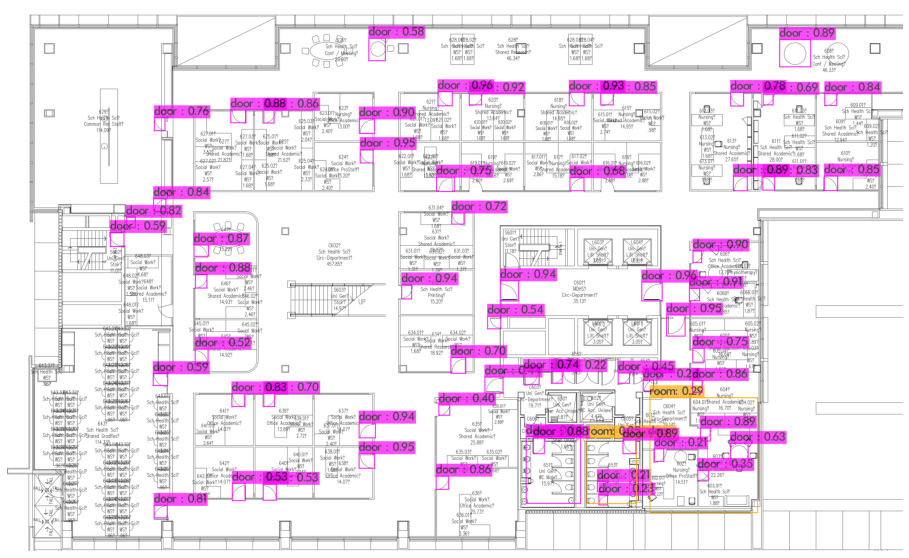

In [ ]:
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /content/drive/My\ Drive/darknetnew/backup/yolov3_custom_last.weights /content/drive/My\ Drive/darknetnew/data/PNG/104L6sp.png -thresh 0.2
print("Done!")
imShow('predictions.jpg')


In [ ]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()


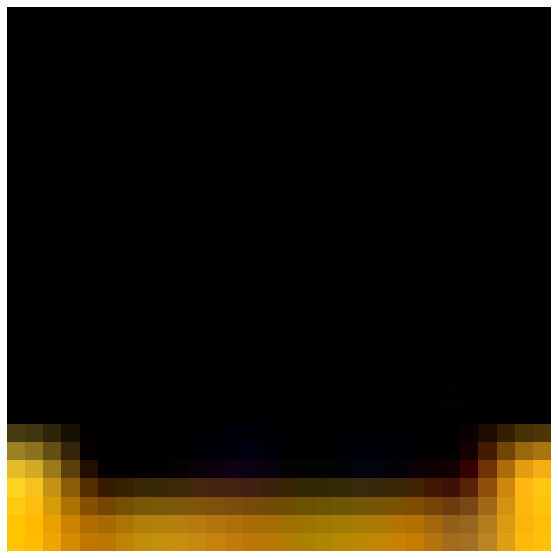

In [ ]:
imShow('predictions.jpg')